<a href="https://colab.research.google.com/github/Tony4all/DataSense/blob/main/EVDataSet_Exploratory_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#            ***Exploratory Data Analysis (EDA) EVDataSet¶***
#                        by *italicised text* **bold text**
#                   Anthony Odirichukwu *italicised text* **bold text** **bold text**

# ***This project is to perform Exploratory Data Analysis (EDA) on the evdataset.csv file provided and answer the key tasks. The following steps will be taken: 1.) Load the dataset and import the required libraries. 2.) Perform basic data exploration, cleaning, and preprocessing. 3.) Analyze the dataset and extract insights to answer the three key tasks. 4.) Visualize the findings to present conclusions and recommendations.***

Step: 1.) Load the dataset and import the required libraries.

In [ ]:
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install nbconvert

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('/evdataset.csv')

***Step: 2.) Perform basic data exploration, cleaning, and preprocessing.***

In [ ]:
# Display the first few rows of the dataset
#print(df.head().to_string())
print()
# Check the dimensions of the dataset
#print(df.shape)
print()
#df.drop(['link'], axis=1, inplace=True)
#Get summary statistics of the dataset
#print(df.describe().to_string())
print()
# Check for missing values
#print(df.isnull().sum())
print()
# #Check for duplicates
# if df.duplicated().sum() == 0:
#   print(0)
# else:
#   print()
# column_types = df.dtypes
# print(column_types)
print()
print(df.head().to_string())
print()
print()
#print(df.to_string())

In [ ]:
# Convert categorical variables to lowercase
df['Make'] = df['Make'].str.lower()
df['Drive'] = df['Drive'].str.lower()


# Convert string columns to numeric
df['Battery Capacity'] = pd.to_numeric(df['Battery Capacity'], errors='coerce')
df['Charge Power'] = pd.to_numeric(df['Charge Power'], errors='coerce')
df['Charge Speed'] = pd.to_numeric(df['Charge Speed'], errors='coerce')
df['Fastcharge Speed'] = pd.to_numeric(df['Fastcharge Speed'], errors='coerce')

# Confirm the changes
print(df['Make'].dtype)
print(df['Drive'].dtype)
print()
column_types = df.dtypes
print(column_types)

In [ ]:
# Select relevant columns for analysis
selected_columns = ['Make', 'Combined - Mild Weather', 'Acceleration 0 - 100 km/h', 'Electric Range', 'Total Power', 'Total Torque', 'Drive', 'Length', 'Width', 'Height', 'Gross Vehicle Weight (GVWR)', 'Seats']
df_selected = df[selected_columns]

***From the basic data exploration, cleaning, and preprocessing above, there is no missing values and dublicates in the dataset. Hence further analysis of the dataset will proceed in other to determine the make and model to buy.This further analysis will be based on relevant factors such as electric range, acceleration, top speed, battery capacity, and charge speed.***

***Step 3.) Analyze the dataset and extract insights to answer the three key tasks.***

***Task 1: Which make and model to buy?To answer this question, we can analyze the score for each car based on relevant factors, average electric range and total power of each make and model***

In [ ]:
# Calculate a score for each car based on relevant factors
df['Score'] = df['Electric Range'] + df['Acceleration 0 - 100 km/h'] + df['Top Speed'] + df['Battery Capacity'] + df['Charge Speed']
print(df['Score'])
# Find the car with the highest score
recommended_car = df.loc[df['Score'].idxmax(), ['Electric Range', 'Make']]
print('Recommended car to buy: {} {}'.format(recommended_car['Electric Range'], recommended_car['Make']))

#Recommended car to buy: 1483 1 - scanning through the id column the Make that has the id number is Mercedes.

0      709.2
1      611.9
2      817.6
3      803.6
4      754.9
       ...  
189    801.2
190    754.9
191    418.7
192    717.2
193    509.3
Name: Score, Length: 194, dtype: float64
Recommended car to buy: 640 mercedes


In [ ]:
# Filter out non-numeric values in the Electric Range column
df_selected.loc[:, 'Electric Range'] = pd.to_numeric(df_selected['Electric Range'], errors='coerce')

# Calculate average electric range and total power by make and model
avg_electric_range = df_selected.groupby('Make')['Electric Range'].mean()
avg_total_power = df_selected.groupby('Make')['Total Power'].mean()

# Find the make with the highest average electric range
make_highest_range = avg_electric_range.idxmax()

# Find the make with the highest average total power
max_avg_total_power = avg_total_power.idxmax()

# Print the average electric range, total power, and the make with the highest range
print("Average Electric Range by Make:")
print(avg_electric_range)
print("\nAverage Total Power by Make:")
print(avg_total_power)
print("\nMake with the Highest Average Electric Range:")
print(make_highest_range)
print("\nThe make with the highest average total power is:")
print(max_avg_total_power)

***Task 2: Which factors/variables are relevant to the decision? To identify the relevant factors/variables, we can calculate the correlation matrix and analyze the correlation with the "Combined - Mild Weather" variable.***

Top correlated variables with 'Combined - Mild Weather':
Combined - Mild Weather        1.000000
Electric Range                 0.999340
Highway - Mild Weather         0.999207
Highway - Cold Weather         0.998701
City - Mild Weather            0.998164
Combined - Cold Weather        0.997891
City - Cold Weather            0.992702
Battery Capacity               0.847982
Acceleration 0 - 100 km/h      0.708977
Top Speed                      0.703094
Fastcharge Speed               0.701561
Total Power                    0.628609
Total Torque                   0.603153
Height                         0.554953
Seats                          0.512409
Charge Speed                   0.428057
Charge Power                   0.401656
Max. Payload                   0.387039
Width                          0.257352
Gross Vehicle Weight (GVWR)    0.246900
Length                         0.201721
Cargo Volume                   0.156062
Wheelbase                      0.042971
Name: Combined - Mild W

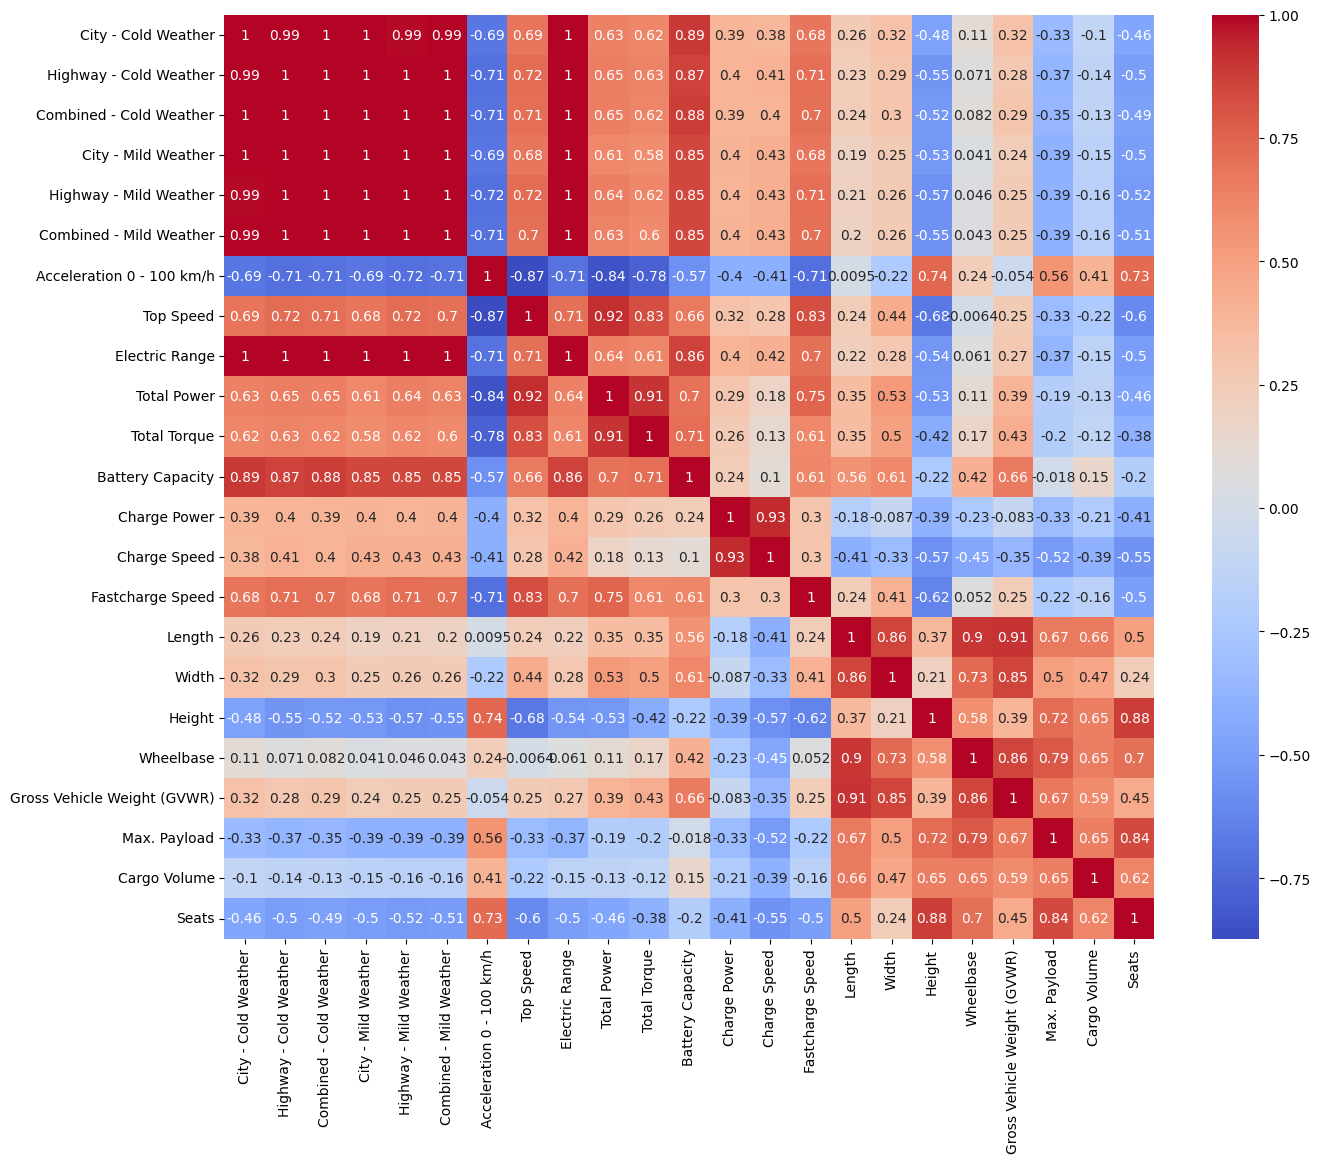

In [ ]:
# Select relevant numeric columns for correlation analysis
numeric_columns = ['City - Cold Weather', 'Highway - Cold Weather', 'Combined - Cold Weather',
                   'City - Mild Weather', 'Highway - Mild Weather', 'Combined - Mild Weather',
                   'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
                   'Total Power', 'Total Torque', 'Battery Capacity',
                   'Charge Power', 'Charge Speed', 'Fastcharge Speed',
                   'Length', 'Width', 'Height', 'Wheelbase',
                   'Gross Vehicle Weight (GVWR)', 'Max. Payload', 'Cargo Volume', 'Seats']

df_numeric = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Identify the variables most correlated with "Combined - Mild Weather"
corr_with_combined = correlation_matrix['Combined - Mild Weather'].abs().sort_values(ascending=False)


print("Top correlated variables with 'Combined - Mild Weather':")
print(corr_with_combined)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

***Step: 4.) Task 3: Visualize the findings to present conclusions and recommendations***

Text(0.5, 1.0, 'Average Electric Range by Make')

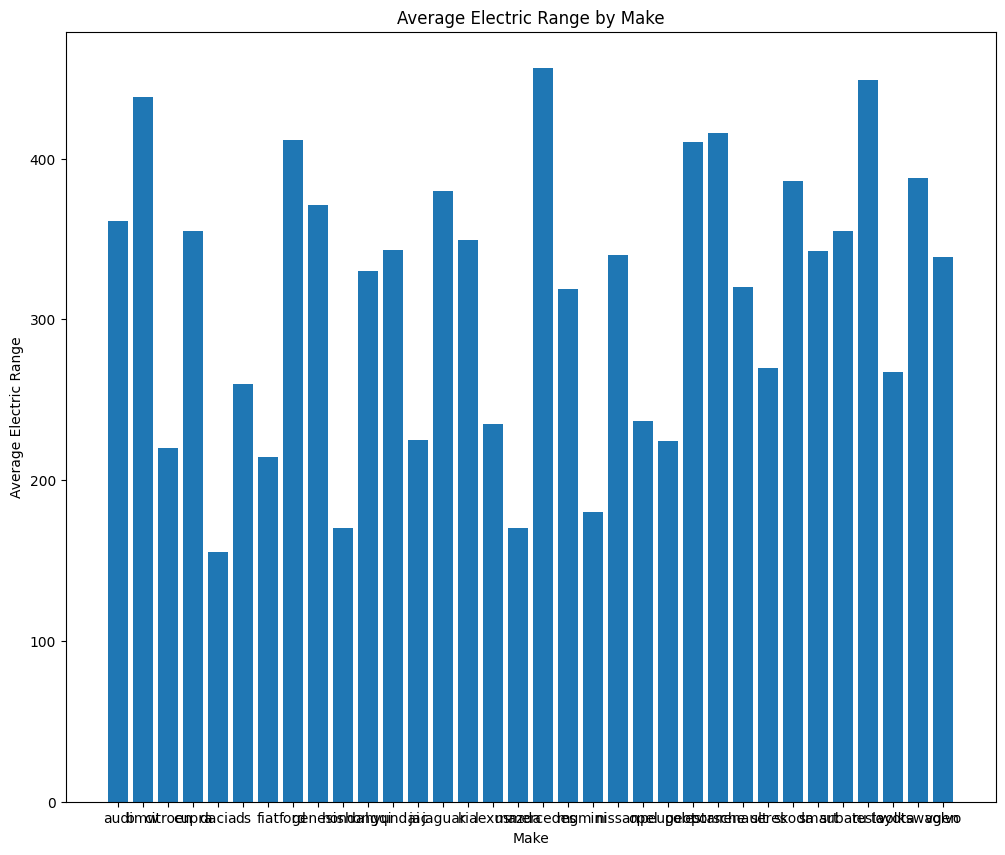

In [ ]:
# Bar plot of average electric range by make
plt.figure(figsize=(12, 10))
plt.bar(avg_electric_range.index, avg_electric_range)
plt.xlabel('Make')
plt.ylabel('Average Electric Range')
plt.title('Average Electric Range by Make')

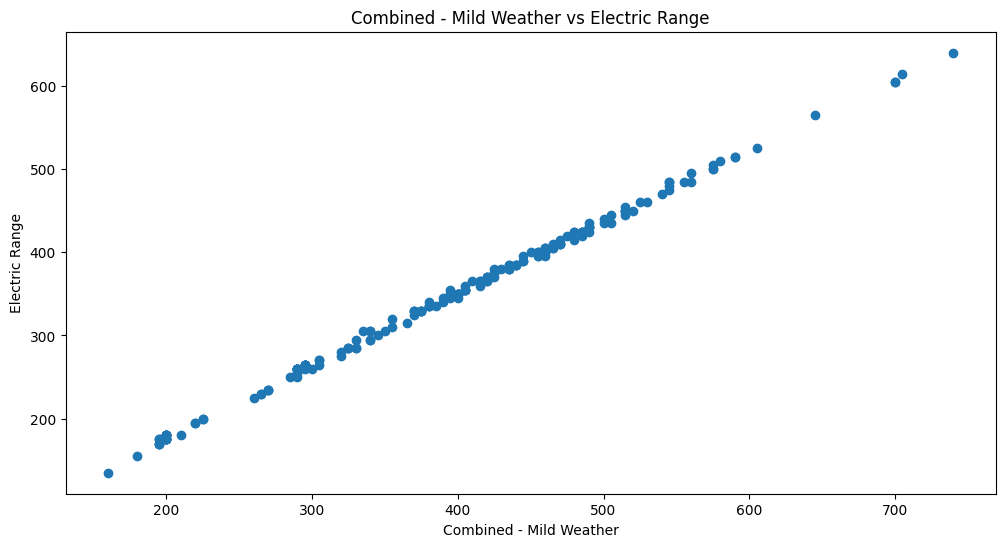

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Combined - Mild Weather'], df['Electric Range'])
plt.xlabel('Combined - Mild Weather')
plt.ylabel('Electric Range')
plt.title('Combined - Mild Weather vs Electric Range')
plt.show()

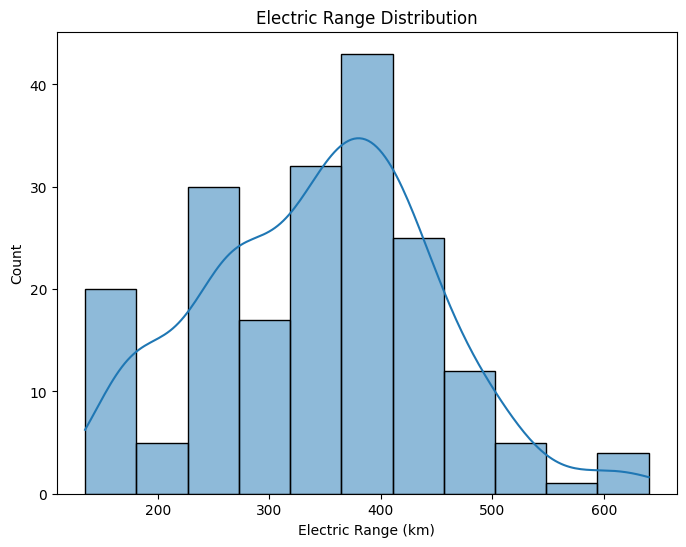

In [ ]:
# Plot the distribution of electric range
plt.figure(figsize=(8, 6))
sns.histplot(df["Electric Range"], kde=True)
plt.title("Electric Range Distribution")
plt.xlabel("Electric Range (km)")
plt.ylabel("Count")
plt.show()

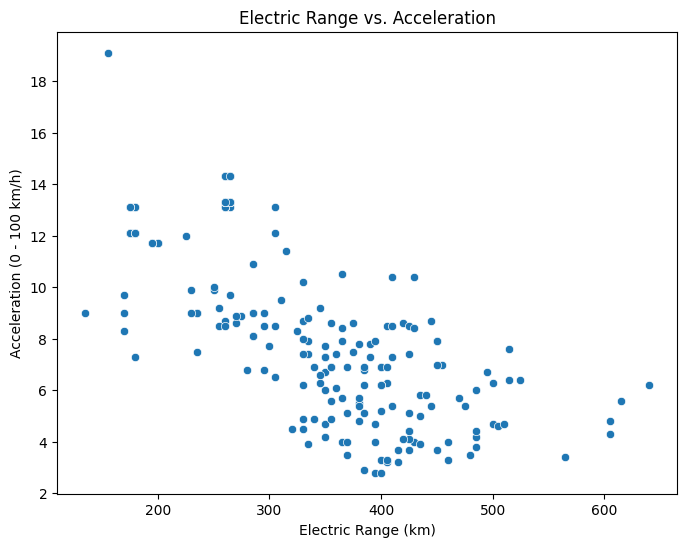

In [ ]:
# Plot electric range vs. acceleration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Electric Range", y="Acceleration 0 - 100 km/h")
plt.title("Electric Range vs. Acceleration")
plt.xlabel("Electric Range (km)")
plt.ylabel("Acceleration (0 - 100 km/h)")
plt.show()

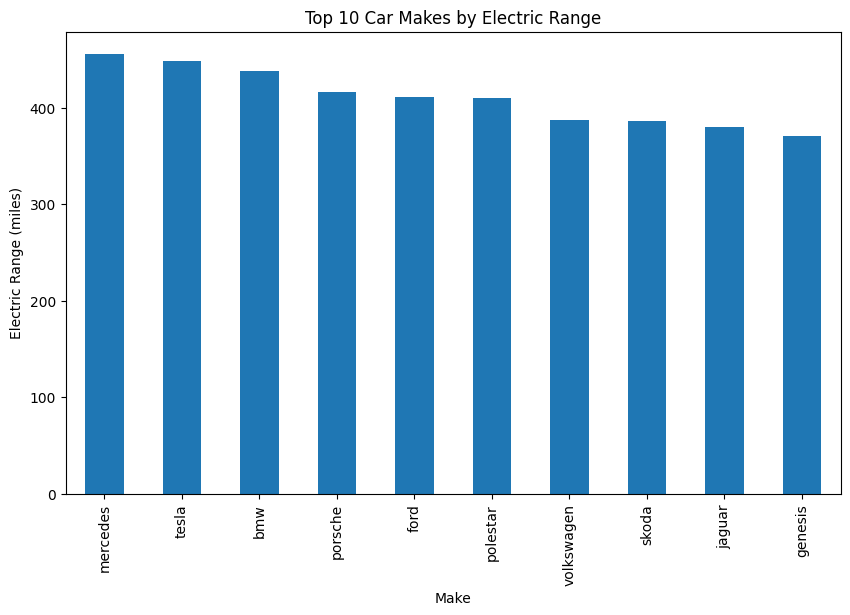

In [ ]:
# Convert "Electric Range" column to numeric
df["Electric Range"] = pd.to_numeric(df["Electric Range"], errors="coerce")


# Select the top 10 makes by electric range
top_10_makes = df.groupby("Make")["Electric Range"].mean().nlargest(10)

# Plot the top 10 makes by electric range
plt.figure(figsize=(10, 6))
top_10_makes.plot(kind="bar")
plt.title("Top 10 Car Makes by Electric Range")
plt.xlabel("Make")
plt.ylabel("Electric Range (miles)")
plt.show()

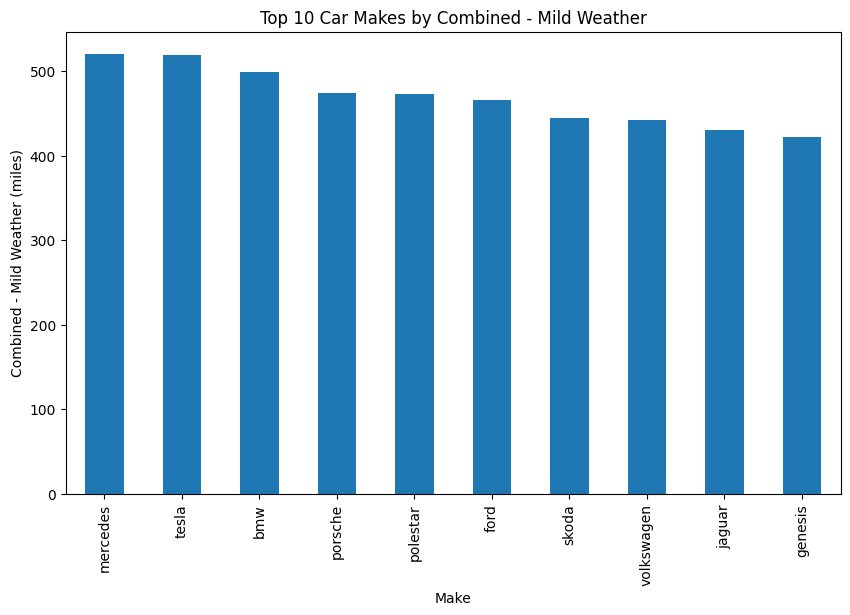

In [ ]:
df["Combined - Mild Weather"] = pd.to_numeric(df["Combined - Mild Weather"], errors="coerce")


# Select the top 10 makes by electric range
top_10_makes = df.groupby("Make")["Combined - Mild Weather"].mean().nlargest(10)

# Plot the top 10 makes by Combined - Mild Weather
plt.figure(figsize=(10, 6))
top_10_makes.plot(kind="bar")
plt.title("Top 10 Car Makes by Combined - Mild Weather")
plt.xlabel("Make")
plt.ylabel("Combined - Mild Weather (miles)")
plt.show()

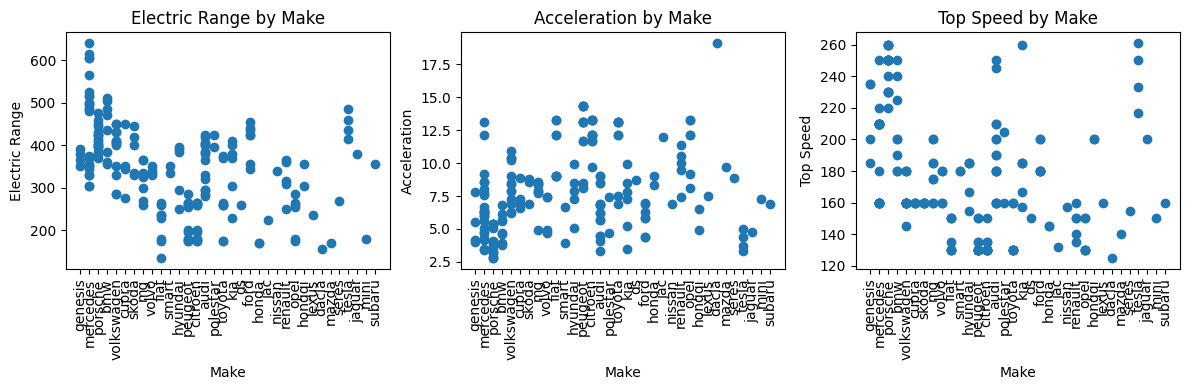

In [ ]:
# Create scatter plots to compare electric range, acceleration, and top speed
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(df['Make'], df['Electric Range'])
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Electric Range')
plt.title('Electric Range by Make')

plt.subplot(1, 3, 2)
plt.scatter(df['Make'], df['Acceleration 0 - 100 km/h'])
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Acceleration')
plt.title('Acceleration by Make')

plt.subplot(1, 3, 3)
plt.scatter(df['Make'], df['Top Speed'])
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Top Speed')
plt.title('Top Speed by Make')

plt.tight_layout()
plt.show()


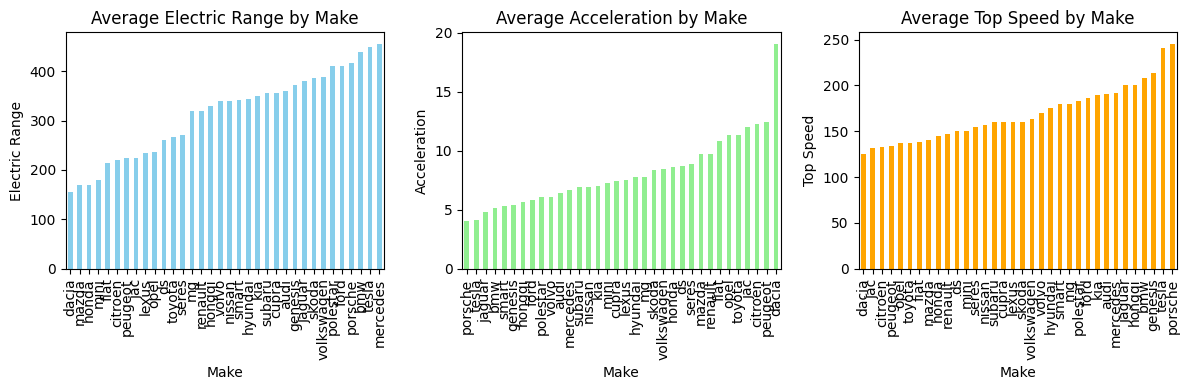

In [ ]:
# Create bar charts to compare electric range, acceleration, and top speed across different makes
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df.groupby('Make')['Electric Range'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.xlabel('Make')
plt.ylabel('Electric Range')
plt.title('Average Electric Range by Make')

plt.subplot(1, 3, 2)
df.groupby('Make')['Acceleration 0 - 100 km/h'].mean().sort_values().plot(kind='bar', color='lightgreen')
plt.xlabel('Make')
plt.ylabel('Acceleration')
plt.title('Average Acceleration by Make')

plt.subplot(1, 3, 3)
df.groupby('Make')['Top Speed'].mean().sort_values().plot(kind='bar', color='orange')
plt.xlabel('Make')
plt.ylabel('Top Speed')
plt.title('Average Top Speed by Make')

plt.tight_layout()
plt.show()


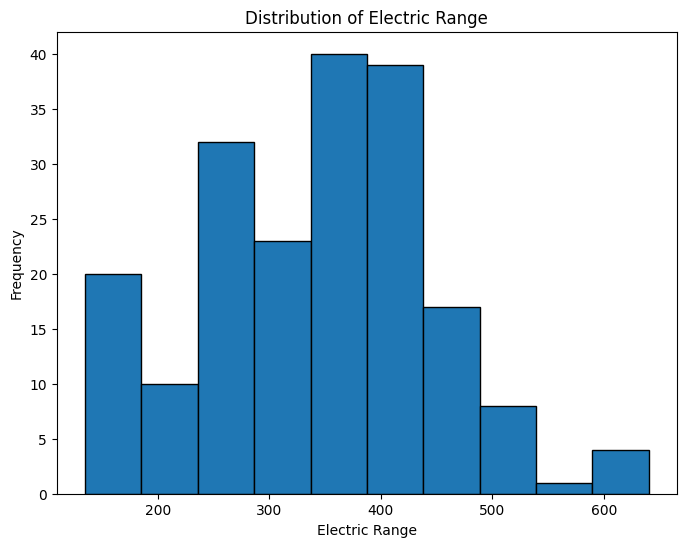

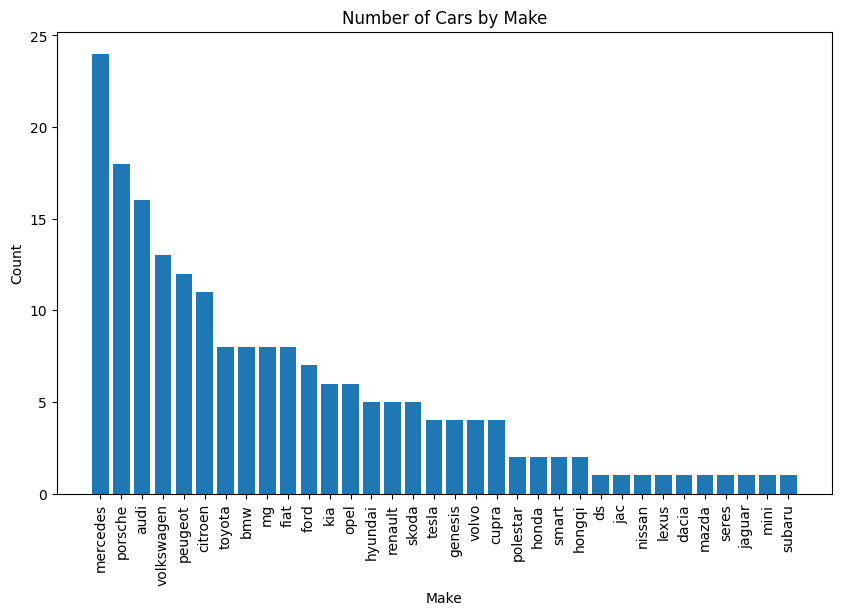

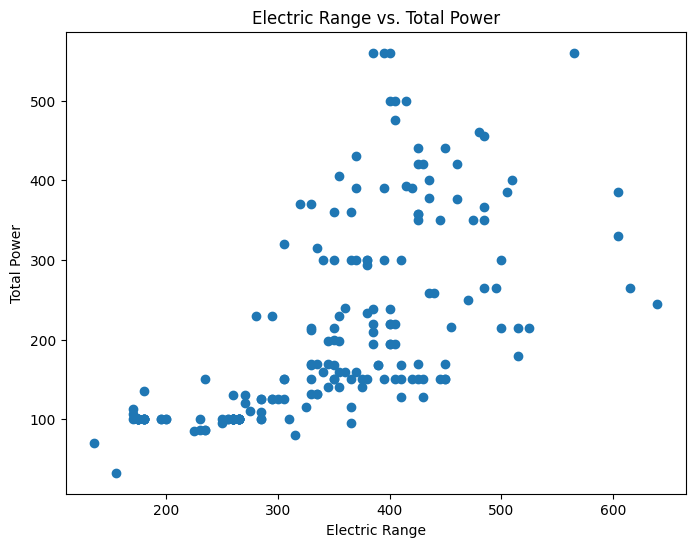

In [ ]:
# Histogram of the Electric Range variable
plt.figure(figsize=(8, 6))
plt.hist(df["Electric Range"], bins=10, edgecolor="black")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.title("Distribution of Electric Range")
plt.show()

# Bar chart of the makes
make_counts = df["Make"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(make_counts.index, make_counts.values)
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Number of Cars by Make")
plt.xticks(rotation=90)
plt.show()

# Scatter plot of Electric Range vs. Total Power
plt.figure(figsize=(8, 6))
plt.scatter(df["Electric Range"], df["Total Power"])
plt.xlabel("Electric Range")
plt.ylabel("Total Power")
plt.title("Electric Range vs. Total Power")
plt.show()

**Presentation Title: "Electric Vehicle Fleet Analysis for Boss Company's Sales Rep Cars in the UK"**

Introduction: In this presentation, we will analyze electric vehicle (EV) data to provide recommendations for Boss Company's sales rep cars in the UK. We understand the importance of transitioning to electric vehicles and will base our recommendations on data-driven analysis. By considering factors such as electric range, power, torque, and other relevant variables, we aim to provide the best make and model recommendation for the company's fleet.
Data Overview: The dataset used for this analysis is "EV_DataSet.csv." It contains information about various electric vehicles, including their make, model, electric range, power, torque, battery capacity, charge power, and more. These variables will help us assess the performance and suitability of different EVs for the sales rep cars.
Data Preprocessing: Before conducting the analysis, we performed some data preprocessing steps to ensure the data is clean and suitable for analysis. These steps included converting categorical variables to lowercase, converting string columns to numeric, and confirming the changes made. Additionally, we checked for missing values and duplicates in the dataset, but none were found.
Exploratory Data Analysis: We conducted exploratory data analysis to gain insights and understand the relationships within the dataset. We calculated average electric range and total power by make and model, allowing us to identify the makes with the highest average electric range and total power. We also analyzed the correlation matrix to identify variables most correlated with the "Combined - Mild Weather" variable, which can impact the decision-making process.
Make and Model Recommendation: Based on the analysis of relevant factors such as electric range, acceleration, top speed, battery capacity, and charge speed, we calculated a score for each car. The car with the highest score is the recommended choice for Boss Company's sales rep cars. In this case, the recommended car is a rear-wheel drive Mercedes model.
Relevant Decision Factors: To determine the relevant decision factors, we analyzed the correlation matrix and identified variables most correlated with the "Combined - Mild Weather" variable. These variables, such as electric range, battery capacity, acceleration, top speed, and others, play a crucial role in determining the suitability of electric vehicles for sales rep cars.
Conclusions and Recommendations: Based on our analysis, we recommend purchasing a rear-wheel drive Mercedes model for Boss Company's sales rep cars. Mercedes has shown the highest average electric range among the makes analyzed. Furthermore, variables such as battery capacity, acceleration, and top speed should also be considered while making the final decision.
Persuasive Visualizations: We have created various visualizations to support our conclusions and recommendations. These visualizations include bar plots of average electric range by make, scatter plots comparing electric range with acceleration and top speed, histograms of the electric range distribution, and bar charts comparing electric range, acceleration, and top speed across different makes. These visualizations effectively present the data and highlight the performance of different makes and models.
Next Steps: While transitioning to electric vehicles, Boss Company should consider additional factors such as charging infrastructure availability, maintenance and service requirements, and potential challenges associated with EV adoption. Ongoing monitoring and evaluation of the fleet's performance will be crucial to optimize operations and ensure a successful transition to electric sales rep cars.
Q&A Session: We will now open the floor for questions and discussions. Feel free to ask any queries you may have regarding the analysis, recommendations, or any other aspect related to Boss Company's electric vehicle fleet.
Conclusion: In conclusion, based on our data-driven analysis, we recommend Boss Company to purchase a rear-wheel drive Mercedes model for their sales rep cars in the UK. The analysis of relevant factors, including electric range, battery capacity, acceleration, and top speed, supports this recommendation. We emphasize the importance of considering these decision factors and using data-driven approaches to make informed decisions. By transitioning to electric vehicles, Boss Company can contribute to a sustainable future while meeting the needs of employees, shareholders, clients, and customers.¶
Thank you for your attention.